Dropdown(description='Select Item:', options=('Apples', 'Vegetables', 'Milk', 'Eggs', 'Bread', 'Pasta', 'Canne…

IntText(value=1, description='Quantity:')

Button(description='Add to Cart', style=ButtonStyle())

Dropdown(description='Remove Item:', options=(), value=None)

Button(description='Remove from Cart', style=ButtonStyle())

Textarea(value='Shopping Cart: ', disabled=True, layout=Layout(height='100px', width='50%'))

Button(description='Generate Path', style=ButtonStyle())

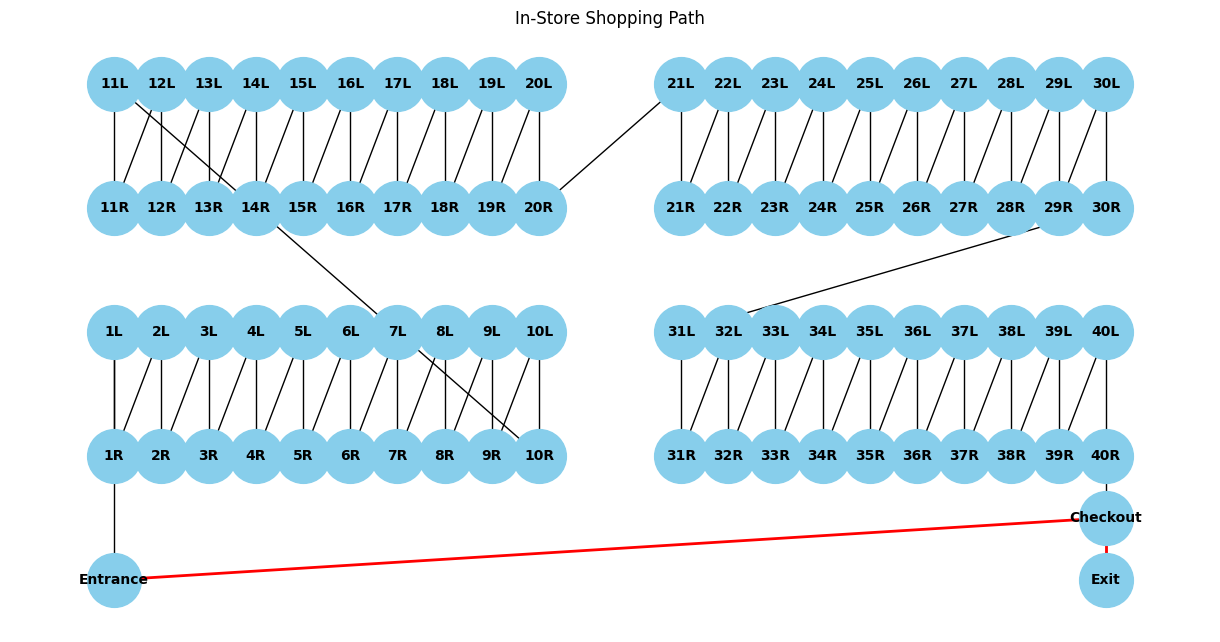

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# 1. Expanded Store Layout and Inventory Organization

# Define the store aisles and sections with 100 items
store_layout = {
    '1L': 'Apples', '1R': 'Vegetables',
    '2L': 'Milk', '2R': 'Eggs',
    '3L': 'Bread', '3R': 'Pasta',
    '4L': 'Canned Goods', '4R': 'Sauces',
    '5L': 'Orange Juice', '5R': 'Snacks',
    '6L': 'Frozen Foods', '6R': 'Ice Cream',
    '7L': 'Meat', '7R': 'Seafood',
    '8L': 'Dairy Products', '8R': 'Cheese',
    '9L': 'Cereal', '9R': 'Grains',
    '10L': 'Cleaning Supplies', '10R': 'Paper Products',
    '11L': 'Toilet Paper', '11R': 'Shampoo',
    '12L': 'Toothpaste', '12R': 'Mouthwash',
    '13L': 'Soap', '13R': 'Detergent',
    '14L': 'Bleach', '14R': 'Sponges',
    '15L': 'Dish Soap', '15R': 'Laundry Pods',
    '16L': 'Fabric Softener', '16R': 'Air Fresheners',
    '17L': 'Trash Bags', '17R': 'Ziploc Bags',
    '18L': 'Aluminum Foil', '18R': 'Plastic Wrap',
    '19L': 'Batteries', '19R': 'Light Bulbs',
    '20L': 'Pet Food', '20R': 'Cat Litter',
    '21L': 'Dog Treats', '21R': 'Cat Treats',
    '22L': 'Coffee', '22R': 'Tea',
    '23L': 'Sugar', '23R': 'Flour',
    '24L': 'Baking Soda', '24R': 'Baking Powder',
    '25L': 'Vanilla Extract', '25R': 'Spices',
    '26L': 'Salt', '26R': 'Pepper',
    '27L': 'Olive Oil', '27R': 'Vinegar',
    '28L': 'Soy Sauce', '28R': 'Ketchup',
    '29L': 'Mustard', '29R': 'Mayonnaise',
    '30L': 'Pickles', '30R': 'Olives',
    '31L': 'Peanut Butter', '31R': 'Jelly',
    '32L': 'Honey', '32R': 'Maple Syrup',
    '33L': 'Rice', '33R': 'Beans',
    '34L': 'Pasta Sauce', '34R': 'Tomato Paste',
    '35L': 'Coconut Milk', '35R': 'Chili',
    '36L': 'Soup', '36R': 'Ramen',
    '37L': 'Macaroni & Cheese', '37R': 'Instant Noodles',
    '38L': 'Crackers', '38R': 'Chips',
    '39L': 'Popcorn', '39R': 'Cookies',
    '40L': 'Granola Bars', '40R': 'Candy'
}

# 2. User's Shopping Cart Selection with Dropdown Menu

# Initialize shopping cart list
shopping_cart = []

# Dropdown menu for selecting items
item_dropdown = widgets.Dropdown(
    options=list(store_layout.values()),
    description='Select Item:',
    disabled=False
)

# Widget to set the number of items to add
item_count = widgets.IntText(
    value=1,
    description='Quantity:',
    disabled=False
)

# Button to add selected item to the shopping cart
add_button = widgets.Button(
    description="Add to Cart"
)

# Dropdown menu for removing items
remove_item_dropdown = widgets.Dropdown(
    options=[],
    description='Remove Item:',
    disabled=False
)

# Button to remove selected item from the shopping cart
remove_button = widgets.Button(
    description="Remove from Cart"
)

# Display current shopping cart
cart_display = widgets.Textarea(
    value='Shopping Cart: ',
    description='',
    disabled=True,
    layout=widgets.Layout(width='50%', height='100px')
)

# Function to add items to the cart
def add_item_to_cart(b):
    item = item_dropdown.value
    count = item_count.value
    for _ in range(count):
        shopping_cart.append(item)
    cart_display.value = "Shopping Cart: " + ', '.join(shopping_cart)
    update_remove_dropdown()

# Function to update the remove dropdown options based on the current cart
def update_remove_dropdown():
    remove_item_dropdown.options = list(set(shopping_cart))

# Function to remove an item from the cart
def remove_item_from_cart(b):
    item = remove_item_dropdown.value
    if item in shopping_cart:
        shopping_cart.remove(item)
        cart_display.value = "Shopping Cart: " + ', '.join(shopping_cart)
    update_remove_dropdown()

# Connect button clicks to functions
add_button.on_click(add_item_to_cart)
remove_button.on_click(remove_item_from_cart)

# Display the dropdowns, button, and cart display
display(item_dropdown, item_count, add_button, remove_item_dropdown, remove_button, cart_display)

# 3. Map Items to Locations
def generate_path_and_display(b):
    cart_locations = {item: location for location, item in store_layout.items() if item in shopping_cart}

    # 4. Define Graph for Store Layout (Nodes and Edges)
    G = nx.Graph()

    # Define nodes (locations) and their positions on the map
    node_positions = {
        'Entrance': (1, 1),
        '1L': (1, 3), '1R': (1, 2),
        '2L': (2, 3), '2R': (2, 2),
        '3L': (3, 3), '3R': (3, 2),
        '4L': (4, 3), '4R': (4, 2),
        '5L': (5, 3), '5R': (5, 2),
        '6L': (6, 3), '6R': (6, 2),
        '7L': (7, 3), '7R': (7, 2),
        '8L': (8, 3), '8R': (8, 2),
        '9L': (9, 3), '9R': (9, 2),
        '10L': (10, 3), '10R': (10, 2),
        '11L': (1, 5), '11R': (1, 4),
        '12L': (2, 5), '12R': (2, 4),
        '13L': (3, 5), '13R': (3, 4),
        '14L': (4, 5), '14R': (4, 4),
        '15L': (5, 5), '15R': (5, 4),
        '16L': (6, 5), '16R': (6, 4),
        '17L': (7, 5), '17R': (7, 4),
        '18L': (8, 5), '18R': (8, 4),
        '19L': (9, 5), '19R': (9, 4),
        '20L': (10, 5), '20R': (10, 4),
        '21L': (11+2, 5), '21R': (11+2, 4),
        '22L': (12+2, 5), '22R': (12+2, 4),
        '23L': (13+2, 5), '23R': (13+2, 4),
        '24L': (14+2, 5), '24R': (14+2, 4),
        '25L': (15+2, 5), '25R': (15+2, 4),
        '26L': (16+2, 5), '26R': (16+2, 4),
        '27L': (17+2, 5), '27R': (17+2, 4),
        '28L': (18+2, 5), '28R': (18+2, 4),
        '29L': (19+2, 5), '29R': (19+2, 4),
        '30L': (20+2, 5), '30R': (20+2, 4),
        '31L': (11+2, 3), '31R': (11+2, 2),
        '32L': (12+2, 3), '32R': (12+2, 2),
        '33L': (13+2, 3), '33R': (13+2, 2),
        '34L': (14+2, 3), '34R': (14+2, 2),
        '35L': (15+2, 3), '35R': (15+2, 2),
        '36L': (16+2, 3), '36R': (16+2, 2),
        '37L': (17+2, 3), '37R': (17+2, 2),
        '38L': (18+2, 3), '38R': (18+2, 2),
        '39L': (19+2, 3), '39R': (19+2, 2),
        '40L': (20+2, 3), '40R': (20+2, 2),
        'Checkout': (20+2, 1.5),
        'Exit': (20+2, 1)
    }

    # Add nodes to the graph
    G.add_nodes_from(node_positions.keys())

    # Define edges to connect nodes (aisles and logical paths)
    edges = [
        ('Entrance', '1L'), ('1L', '1R'), ('1R', '2L'),
        ('2L', '2R'), ('2R', '3L'), ('3L', '3R'),
        ('3R', '4L'), ('4L', '4R'), ('4R', '5L'),
        ('5L', '5R'), ('5R', '6L'), ('6L', '6R'),
        ('6R', '7L'), ('7L', '7R'), ('7R', '8L'),
        ('8L', '8R'), ('8R', '9L'), ('9L', '9R'),
        ('9R', '10L'), ('10L', '10R'), ('10R', '11L'),
        ('11L', '11R'), ('11R', '12L'), ('12L', '12R'),
        ('12R', '13L'), ('13L', '13R'), ('13R', '14L'),
        ('14L', '14R'), ('14R', '15L'), ('15L', '15R'),
        ('15R', '16L'), ('16L', '16R'), ('16R', '17L'),
        ('17L', '17R'), ('17R', '18L'), ('18L', '18R'),
        ('18R', '19L'), ('19L', '19R'), ('19R', '20L'),
        ('20L', '20R'), ('20R', '21L'), ('21L', '21R'),
        ('21R', '22L'), ('22L', '22R'), ('22R', '23L'),
        ('23L', '23R'), ('23R', '24L'), ('24L', '24R'),
        ('24R', '25L'), ('25L', '25R'), ('25R', '26L'),
        ('26L', '26R'), ('26R', '27L'), ('27L', '27R'),
        ('27R', '28L'), ('28L', '28R'), ('28R', '29L'),
        ('29L', '29R'), ('29R', '30L'), ('30L', '30R'),
        ('30R', '31L'), ('31L', '31R'), ('31R', '32L'),
        ('32L', '32R'), ('32R', '33L'), ('33L', '33R'),
        ('33R', '34L'), ('34L', '34R'), ('34R', '35L'),
        ('35L', '35R'), ('35R', '36L'), ('36L', '36R'),
        ('36R', '37L'), ('37L', '37R'), ('37R', '38L'),
        ('38L', '38R'), ('38R', '39L'), ('39L', '39R'),
        ('39R', '40L'), ('40L', '40R'), ('40R', 'Checkout'),
        ('Checkout', 'Exit')
    ]
    G.add_edges_from(edges)

    # 5. Find the Optimal Path
    # Create a path through the locations in the order they are needed
    path = ['Entrance']
    for item, location in cart_locations.items():
        path.append(location)
    path.append('Checkout')
    path.append('Exit')

    # 6. Visualize the Path on the Store Layout
    plt.figure(figsize=(12, 6))

    # Draw the graph with nodes, edges, and positions
    nx.draw(G, pos=node_positions, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')

    # Highlight the optimal path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos=node_positions, edgelist=path_edges, edge_color='red', width=2)

    # Annotate items on the map
    for item, location in cart_locations.items():
        x, y = node_positions[location]
        plt.text(x, y+0.1, item, fontsize=12, ha='center', color='black')

    plt.title("In-Store Shopping Path")
    plt.show()

# Button to generate path and display map
generate_path_button = widgets.Button(
    description="Generate Path"
)

# Function to generate path and display it
generate_path_button.on_click(generate_path_and_display)

# Display the button
display(generate_path_button)
